In [1]:
pip install streamlit pandas numpy scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv("indian_ecommerce_dataset.csv")
df.dropna(subset=['CustomerID', 'Price'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)

df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

df['TotalAmount'] = df['Quantity'] * df['Price']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

df.to_csv("cleaned_ecommerce_data.csv", index=False)

print("Data cleaning completed and saved!")


Data cleaning completed and saved!


In [3]:
df = pd.read_csv("cleaned_ecommerce_data.csv")

if 'InvoiceNo' in df.columns:
    user_features = df.groupby('CustomerID').agg(
        Total_Spending=('TotalAmount', 'sum'),
        Total_Orders=('InvoiceNo', 'count'),
        Avg_Order_Value=('TotalAmount', 'mean')
    ).reset_index()
else:
    user_features = df.groupby('CustomerID').agg(
        Total_Spending=('TotalAmount', 'sum'),
        Total_Orders=('CustomerID', 'count'),  # Fallback count
        Avg_Order_Value=('TotalAmount', 'mean')
    ).reset_index()
    print("⚠️ Warning: 'InvoiceNo' not found. Using CustomerID count instead.")

product_features = df.groupby('StockCode').agg(
    Total_Units_Sold=('Quantity', 'sum'),
    Total_Revenue=('TotalAmount', 'sum'),
    Avg_Product_Price=('Price', 'mean')
).reset_index()


user_features.to_csv("user_features.csv", index=False)
product_features.to_csv("product_features.csv", index=False)

print("✅ Feature extraction completed and saved!")


⚠️ Warning: 'InvoiceNo' not found. Using CustomerID count instead.
✅ Feature extraction completed and saved!


In [4]:
df['CustomerID']

0         41758
1         41758
2         41758
3         41758
4         40870
          ...  
138768    99359
138769     1974
138770     1974
138771    57310
138772    57310
Name: CustomerID, Length: 138773, dtype: int64

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Year,Month,Day
0,84147,IN050,Bamboo Plant Stand,1.0,2024-07-25,670.0,41758,India,670.0,2024,7,25
1,84147,IN030,Bamboo Lamp,2.0,2025-01-10,3257.0,41758,India,6514.0,2025,1,10
2,84147,IN014,Brass Elephant Statue,3.0,2024-03-28,3686.0,41758,India,11058.0,2024,3,28
3,84147,IN047,Wooden Jewelry Box,1.0,2024-06-12,2558.0,41758,India,2558.0,2024,6,12
4,761720,IN020,Handmade Pottery Mug,5.0,2024-10-02,3897.0,40870,India,19485.0,2024,10,2


In [6]:
df.tail(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Year,Month,Day
138763,996460,IN019,NaN,5.0,2024-08-25,1372.0,21098,India,6860.0,2024,8,25
138764,557986,IN040,Bamboo Cutlery Set,3.0,2024-04-24,4706.0,1999,India,14118.0,2024,4,24
138765,557986,IN046,Brass Bell,5.0,2024-09-15,3640.0,1999,India,18200.0,2024,9,15
138766,29359,IN011,Pashmina Shawl,4.0,2024-09-27,2301.0,99359,India,9204.0,2024,9,27
138767,29359,IN016,Copper Water Bottle,2.0,2024-08-08,2956.0,99359,India,5912.0,2024,8,8
138768,29359,IN039,Ceramic Bowl Set,1.0,2024-05-16,1514.0,99359,India,1514.0,2024,5,16
138769,280284,IN003,Brass Diya Set,1.0,2024-09-03,3315.0,1974,India,3315.0,2024,9,3
138770,280284,IN012,Marble Coaster Set,3.0,2024-08-02,870.0,1974,India,2610.0,2024,8,2
138771,248083,IN045,Cotton Curtains,5.0,2024-08-20,4047.0,57310,India,20235.0,2024,8,20
138772,248083,IN047,Wooden Jewelry Box,5.0,2024-08-27,2558.0,57310,India,12790.0,2024,8,27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138773 entries, 0 to 138772
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      138773 non-null  int64  
 1   StockCode    138773 non-null  object 
 2   Description  131788 non-null  object 
 3   Quantity     138773 non-null  float64
 4   InvoiceDate  138773 non-null  object 
 5   Price        138773 non-null  float64
 6   CustomerID   138773 non-null  int64  
 7   Country      138773 non-null  object 
 8   TotalAmount  138773 non-null  float64
 9   Year         138773 non-null  int64  
 10  Month        138773 non-null  int64  
 11  Day          138773 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 12.7+ MB


In [8]:
df.shape

(138773, 12)

In [9]:
import pandas as pd

df = pd.read_csv("cleaned_ecommerce_data.csv")

if "InvoiceDate" in df.columns:
    df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

if "Year" not in df.columns:
    df["Year"] = df["InvoiceDate"].dt.year
if "Month" not in df.columns:
    df["Month"] = df["InvoiceDate"].dt.month

# 1️⃣ Aggregation: Total sales per month
monthly_sales = df.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()

# 2️⃣ Roll-up: Aggregate sales at the yearly level
yearly_sales = df.groupby('Year')['TotalAmount'].sum().reset_index()

# 3️⃣ Drill-down: Find sales per product per month
product_sales = df.groupby(['StockCode', 'Year', 'Month'])['TotalAmount'].sum().reset_index()

# 4️⃣ Slicing: Extract data only for a specific year (example: 2023)
sales_2023 = df[df['Year'] == 2023]

monthly_sales.to_csv("monthly_sales.csv", index=False)
yearly_sales.to_csv("yearly_sales.csv", index=False)
product_sales.to_csv("product_sales.csv", index=False)
sales_2023.to_csv("sales_2023.csv", index=False)

print("✅ OLAP operations completed and saved!")


✅ OLAP operations completed and saved!


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

df = pd.read_csv("cleaned_ecommerce_data.csv")
basket = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules.to_csv("association_rules.csv", index=False)

print("✅ Association rule mining completed and saved!")


C:\Users\Laksh Gupta\AppData\Local\Temp\ipykernel_3340\1544349140.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


✅ Association rule mining completed and saved!


In [11]:
from sklearn.model_selection import train_test_split
df_model = df[['CustomerID', 'StockCode', 'Quantity', 'TotalAmount']]

# Split into training (80%) and testing (20%)
train_data, test_data = train_test_split(df_model, test_size=0.2, random_state=42)

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("✅ Train-test split completed!")


✅ Train-test split completed!


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import pickle

train_data = pd.read_csv("train_data.csv")

user_product_matrix = train_data.pivot_table(index='CustomerID', columns='StockCode', values='TotalAmount', fill_value=0)
user_product_sparse = csr_matrix(user_product_matrix)

k = min(user_product_matrix.shape) - 1  
U, sigma, Vt = svds(user_product_sparse, k=k)
sigma = np.diag(sigma)

predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_df = pd.DataFrame(predicted_ratings, index=user_product_matrix.index, columns=user_product_matrix.columns)

predicted_df.to_csv("predicted_recommendations.csv")
print("✅ Recommendation model trained and saved!")

# Save model using Pickle
with open("trained_model.pkl", "wb") as file:
    pickle.dump(predicted_df, file)

print("✅ Model saved as 'trained_model.pkl'!")


✅ Recommendation model trained and saved!
✅ Model saved as 'trained_model.pkl'!


C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


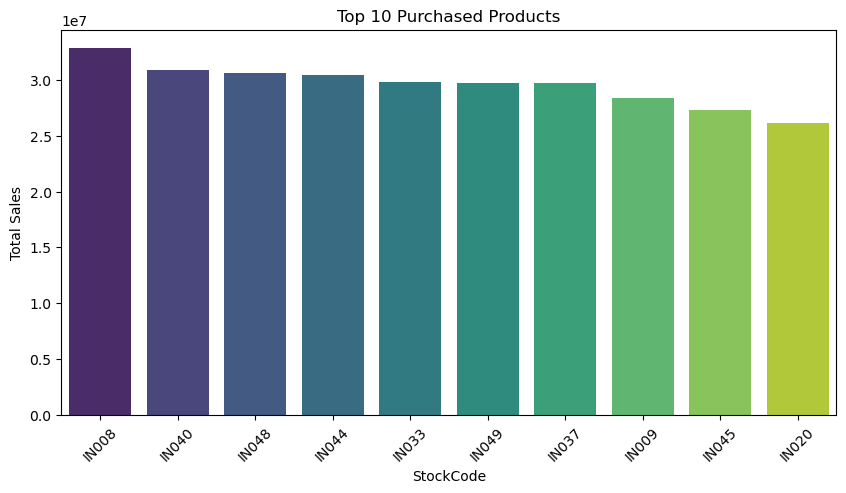

In [13]:
top_products = train_data.groupby("StockCode")["TotalAmount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xlabel("StockCode")
plt.ylabel("Total Sales")
plt.title("Top 10 Purchased Products")
plt.xticks(rotation=45)
plt.show()

C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


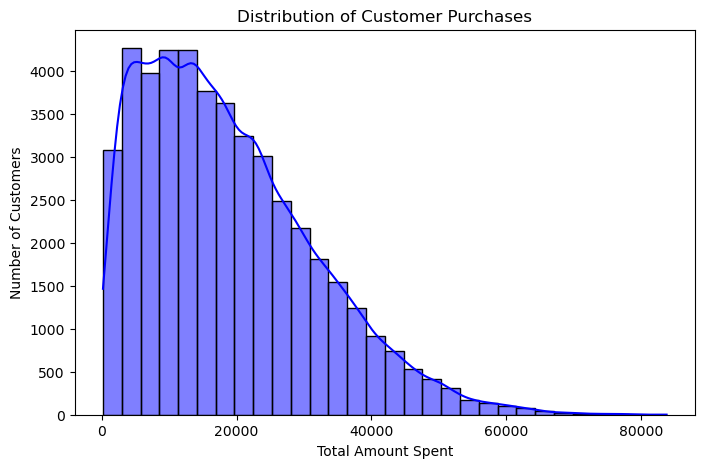

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data.groupby("CustomerID")["TotalAmount"].sum(), bins=30, kde=True, color='blue')
plt.xlabel("Total Amount Spent")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Purchases")
plt.show()

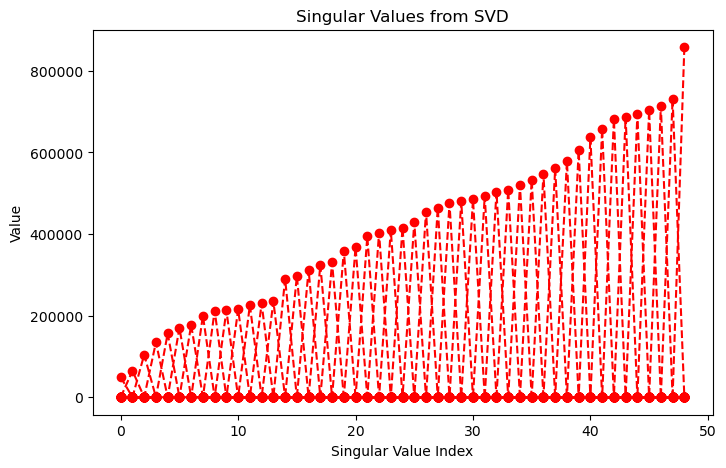

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(sigma, marker="o", linestyle="dashed", color="red")
plt.xlabel("Singular Value Index")
plt.ylabel("Value")
plt.title("Singular Values from SVD")
plt.show()

In [16]:
true_values = user_product_matrix.values.flatten()
predicted_values = predicted_ratings.flatten()

mse = mean_squared_error(true_values, predicted_values)
print(f"Mean Squared Error (MSE): {mse:.4f}")

threshold = np.percentile(true_values, 75)  # Top 25% purchases as positive class
true_binary = (true_values >= threshold).astype(int)
predicted_binary = (predicted_values >= threshold).astype(int)

precision = precision_score(true_binary, predicted_binary, zero_division=1)
recall = recall_score(true_binary, predicted_binary, zero_division=1)
f1 = f1_score(true_binary, predicted_binary, zero_division=1)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Mean Squared Error (MSE): 420.1974
Precision: 1.0000
Recall: 0.1123
F1 Score: 0.2019


In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

#  Normalize the matrix

scaler = MinMaxScaler()
user_product_matrix_scaled = pd.DataFrame(
    scaler.fit_transform(user_product_matrix),
    index=user_product_matrix.index,
    columns=user_product_matrix.columns
)


#  Filter out low-activity users

min_purchases = 3
user_activity = user_product_matrix_scaled.notna().sum(axis=1)
filtered_users = user_activity[user_activity >= min_purchases].index
user_product_matrix_scaled = user_product_matrix_scaled.loc[filtered_users]


#  Apply SVD with more components

svd = TruncatedSVD(n_components=40, random_state=42)
matrix_filled = user_product_matrix_scaled.fillna(0)
svd_matrix = svd.fit_transform(matrix_filled)
predicted_ratings = np.dot(svd_matrix, svd.components_)


#  Evaluate only known (non-NaN) ratings

mask = ~np.isnan(user_product_matrix_scaled.values)
true_values = user_product_matrix_scaled.values[mask]
predicted_values = predicted_ratings[mask]


#  Experiment with a dynamic threshold (e.g. 65th percentile)

threshold = np.percentile(true_values, 65)
true_binary = (true_values >= threshold).astype(int)
predicted_binary = (predicted_values >= threshold).astype(int)


#   Compute Evaluation Metrics

mse = mean_squared_error(true_values, predicted_values)
precision = precision_score(true_binary, predicted_binary, zero_division=1)
recall = recall_score(true_binary, predicted_binary, zero_division=1)
f1 = f1_score(true_binary, predicted_binary, zero_division=1)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Mean Squared Error (MSE): 0.0039
Precision: 1.0000
Recall: 0.5535
F1 Score: 0.7126


C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laksh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


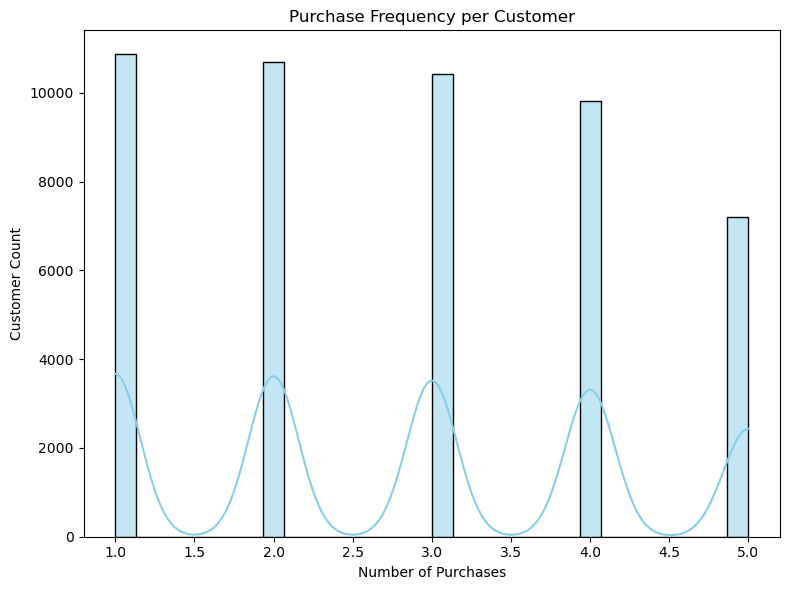

In [18]:
purchase_freq = df['CustomerID'].value_counts()
plt.figure(figsize=(8,6))
sns.histplot(purchase_freq, bins=30, kde=True, color='skyblue')
plt.title('Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()


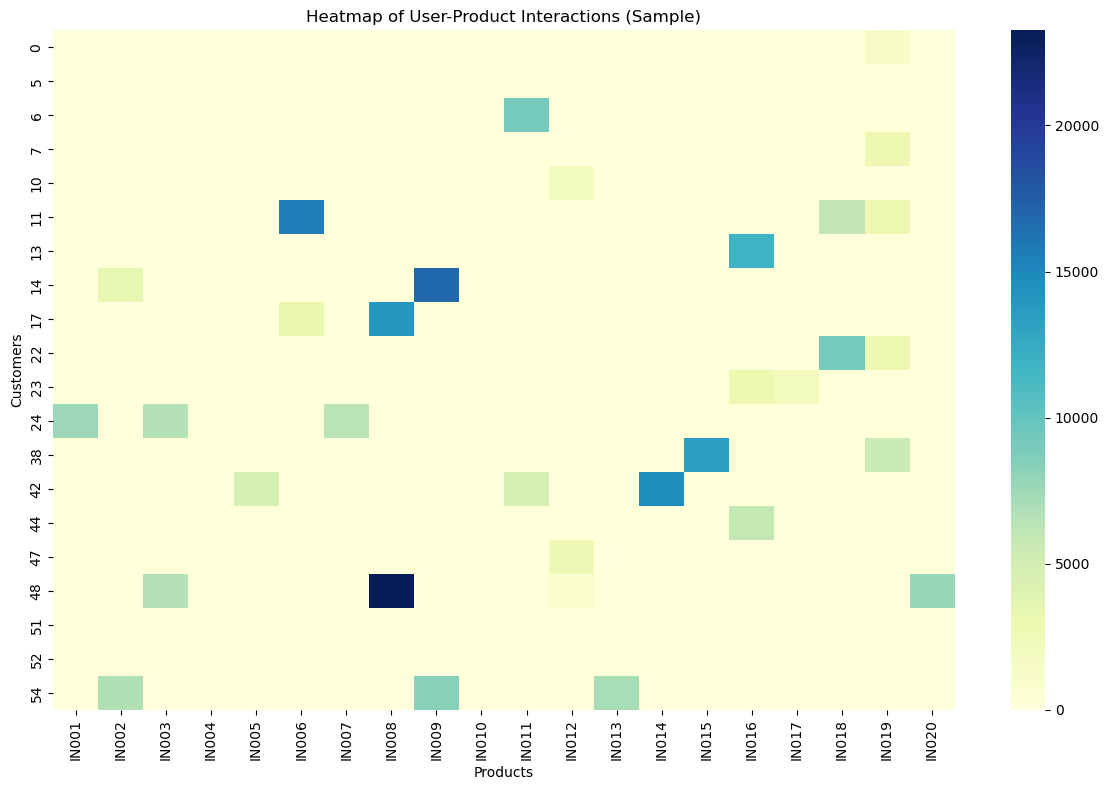

In [19]:
sample_matrix = user_product_matrix.iloc[:20, :20]
plt.figure(figsize=(12,8))
sns.heatmap(sample_matrix, cmap='YlGnBu')
plt.title('Heatmap of User-Product Interactions (Sample)')
plt.xlabel('Products')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()


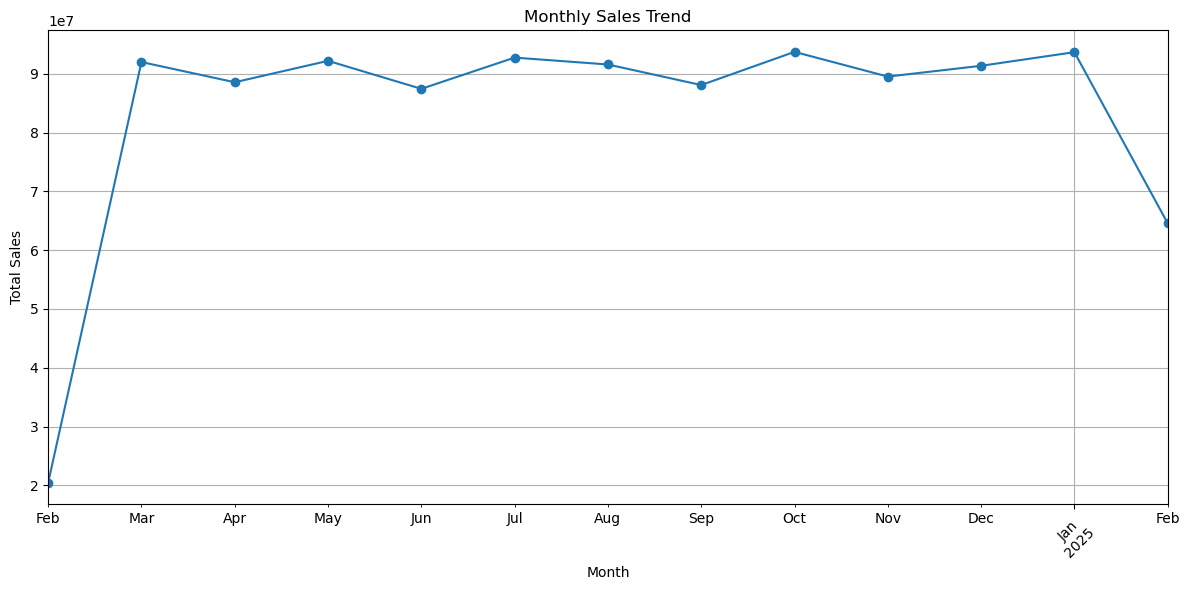

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


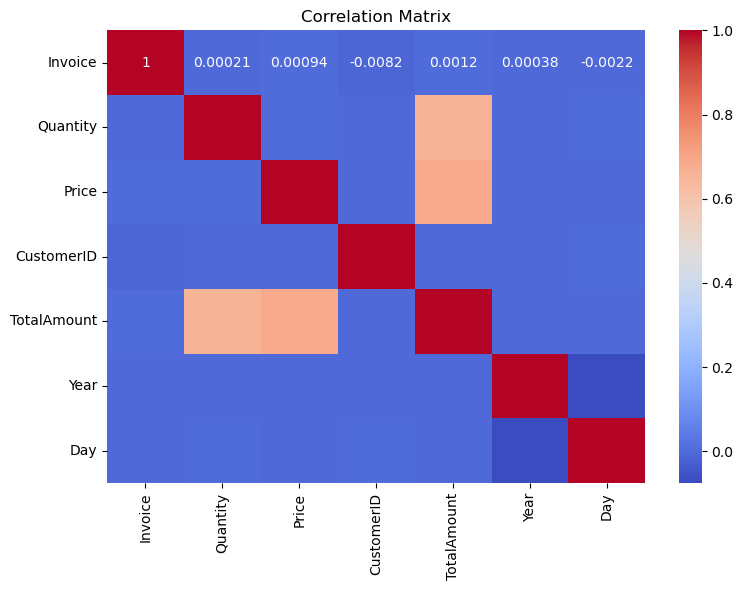

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


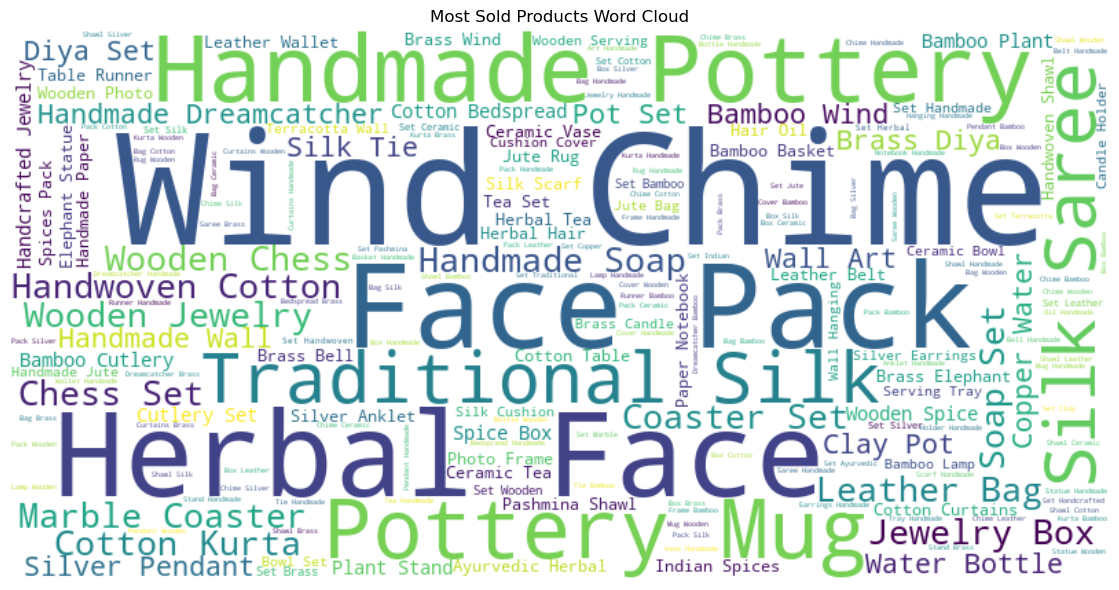

In [22]:
from wordcloud import WordCloud

text = ' '.join(df['Description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Sold Products Word Cloud')
plt.tight_layout()
plt.show()
